<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [18]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-20 23:04:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.2’

survey-results-publ 100%[===================>] 201.62M  10.5MB/s    in 23s     

2025-11-20 23:04:31 (8.68 MB/s) - ‘survey-results-public.sqlite.2’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 175.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.9 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 48.7 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


Matplotlib is building the font cache; this may take a moment.


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                     

#### Demo 2: List All Tables


In [27]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [28]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


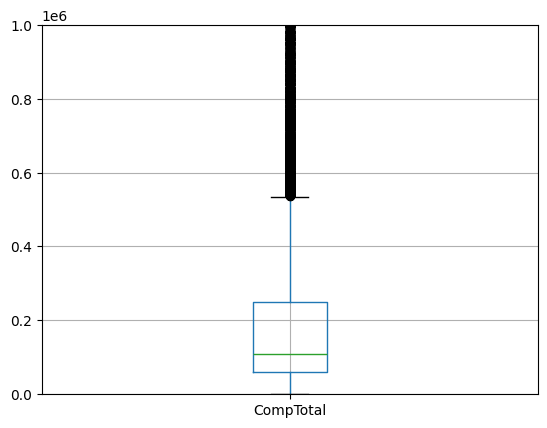

In [6]:
# your code goes here
df.boxplot(column='CompTotal')
plt.ylim(0,1000000)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [7]:
# your code goes here
replacements = {'Under 18 years old': 18, '35-44 years old': 39.5,'45-54 years old': 49.5,'18-24 years old': 21,'25-34 years old': 29.5,'55-64 years old': 59.5,'65 years or older': 65,'Prefer not to say':0}
df['Age'] = df['Age'].replace(replacements)


/tmp/ipykernel_301/376816955.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace(replacements)


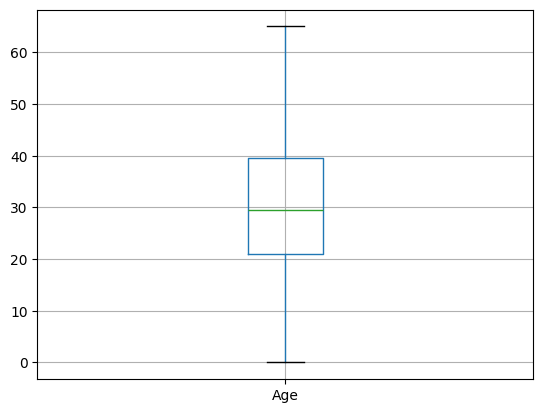

In [8]:
df.boxplot(column='Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


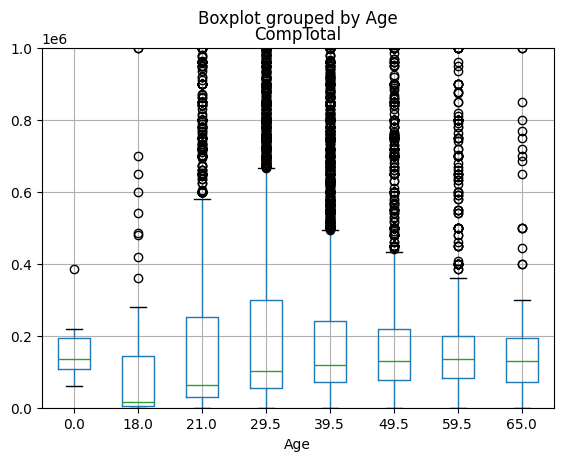

In [9]:
# your code goes here
df.boxplot(column='CompTotal',by='Age')
plt.ylim(0,1000000)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 800x100000 with 0 Axes>

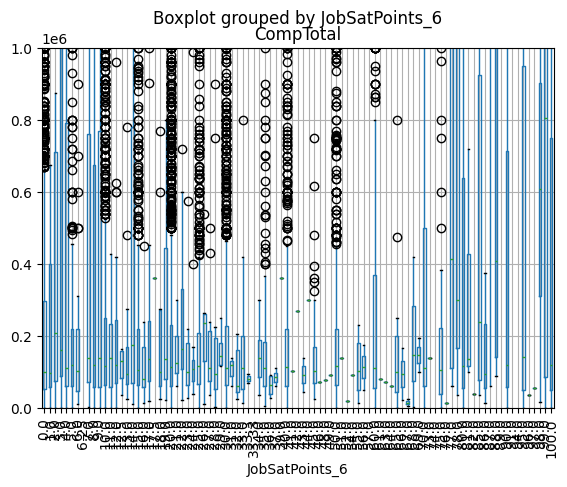

In [10]:
# your code goes here
plt.figure(figsize=(8, 1000))
df.boxplot(column='CompTotal',by='JobSatPoints_6')
plt.ylim(0,1000000)
plt.tick_params(axis='x', rotation=90)

plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


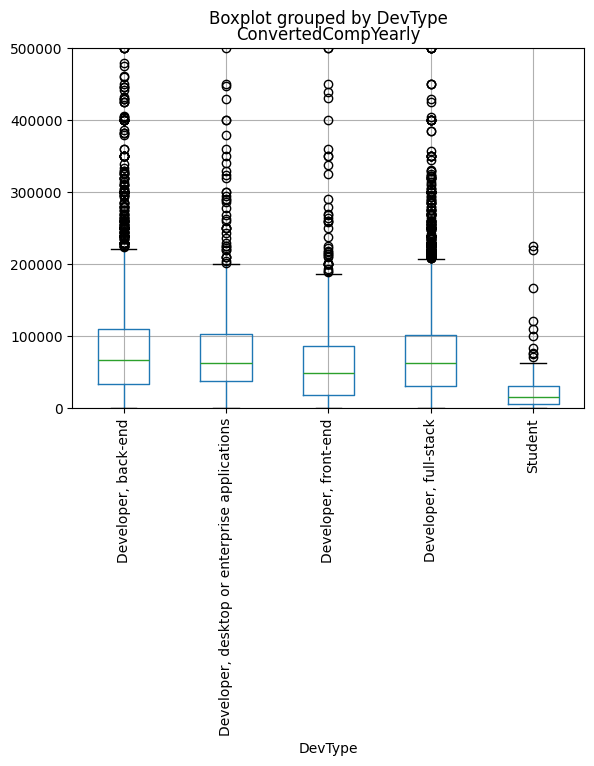

In [20]:
# your code goes here
df[df['DevType'].isin(df['DevType'].dropna().value_counts().keys()[0:5])].boxplot(column='ConvertedCompYearly',by='DevType')
plt.ylim(0,500000)
plt.tick_params(axis='x', rotation=90)

plt.show()

In [21]:
df[df['MainBranch'].isin(df['MainBranch'].dropna().value_counts().keys()[0:5])][['MainBranch','ConvertedCompYearly']].dropna()

,MainBranch,ConvertedCompYearly
72,I am a developer by profession,7322.0
374,"I am not primarily a developer, but I write co...",30074.0
379,I am a developer by profession,91295.0
385,I am a developer by profession,53703.0
389,I am a developer by profession,110000.0
...,...,...
41180,I am a developer by profession,44640.0
41184,I am a developer by profession,170000.0
41185,I am a developer by profession,116844.0
41186,I am a developer by profession,12000.0


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


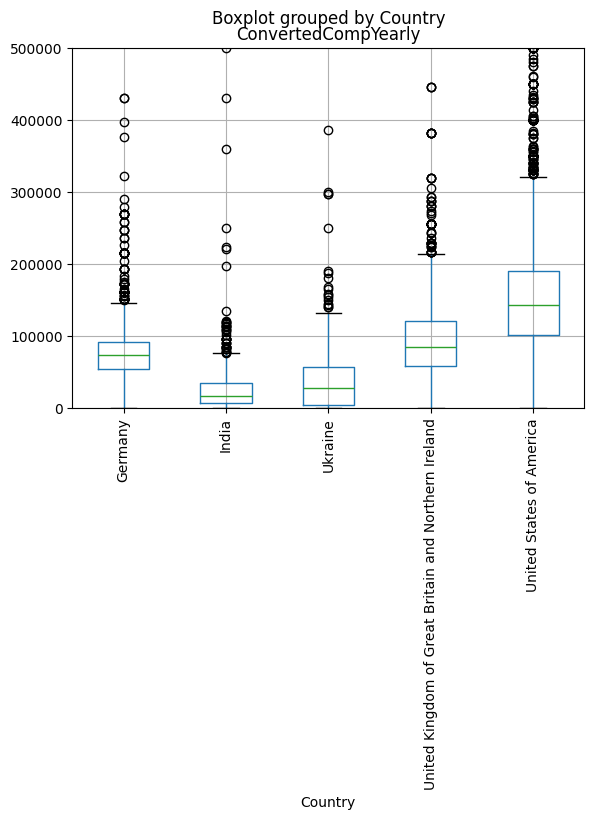

In [22]:
# your code goes here
df[df['Country'].isin(df['Country'].dropna().value_counts().keys()[0:5])].boxplot(column='ConvertedCompYearly',by='Country')
plt.ylim(0,500000)
plt.tick_params(axis='x', rotation=90)

plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


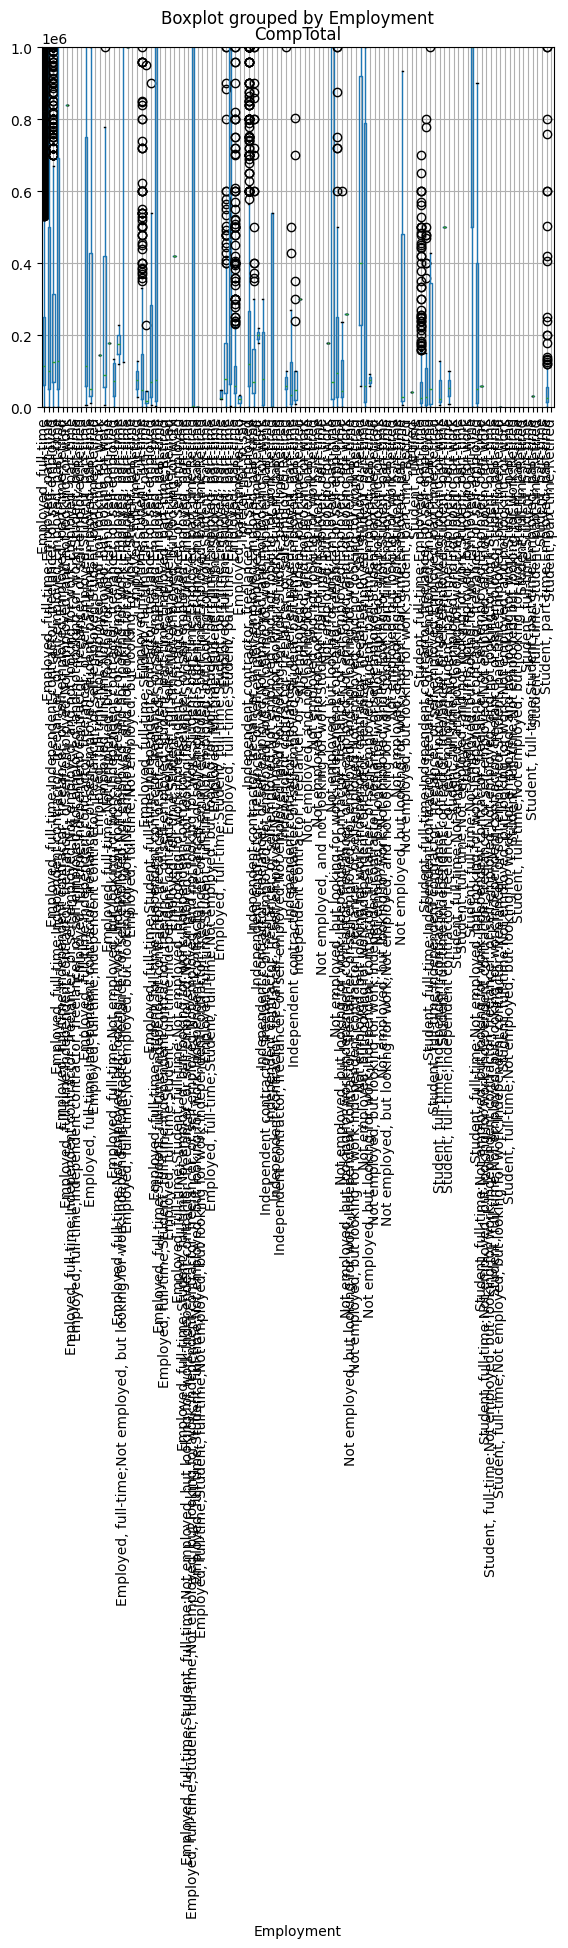

In [23]:
# your code goes here
df.boxplot(column='CompTotal',by='Employment')
plt.ylim(0,1000000)
plt.tick_params(axis='x', rotation=90)

plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [27]:
# your code goes here
df.boxplot(column='YearsCodePro',by='JobSatPoints_6')
plt.ylim(0,1000000)
plt.tick_params(axis='x', rotation=90)

plt.show()

TypeError: can only concatenate str (not "int") to str

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

In [26]:
replacements = {'Less than 1 year': 0, 'More than 50 years': 50}
df['YearsCodePro'] = df['YearsCodePro'].replace(replacements)

In [25]:
df['YearsCodePro'].unique()

array([None, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
